# (Week2) 📉二次元配列と勾配問題
```aim```
+ 数式演算ライブラリのNumPyに慣れる
+ 勾配を求めてみる

---
## 【問題1】1次関数
```Cf.```
+ [NumPyのarange, linspaceの使い方（連番や等差数列を生成）- note.nkmk.me](https://note.nkmk.me/python-numpy-arange-linspace/)

$$
y = \frac{1}{2}x+1\
,\
(-50<x<50)
$$

  -50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [5]:
import numpy as np

x_min = -50
x_max = 50
width = 0.1
     
x =np.arange(x_min, x_max+width, width) 

y = 0.5*x + 1

print(x.shape, type(x), x)
print(y.shape, type(y), y)

(1001,) <class 'numpy.ndarray'> [-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
(1001,) <class 'numpy.ndarray'> [-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


---
## 【問題2】配列の結合

    問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [21]:
ndarray = np.vstack((x, y)).T

print(ndarray.shape)
ndarray

(1001, 2)


array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

---
## 【問題3】勾配を求める
```Cf.```
+ [勾配の計算は？1分でわかる意味、単位、パーセント、1/100、20パーセントの関係 - ](http://kentiku-kouzou.jp/kouzoukeisan-koubai.html)


<img src="https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png" alt="Image from Gyazo" loading="lazy" width=25%>

    各変化量は以下の図のように隣同士の要素の差から近似的に求めます。
    
<img src="https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png" alt="Image from Gyazo" loading="lazy" width='35%'>

    《注意》
    - 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
    - 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります



In [47]:
first = ndarray[1:, ]
second = ndarray[:-1, ]
print('# 引かれる値：{0}\n{1} \n # 引く値:{2}\n{3}'.format(
                                                first.shape, first[:2], 
                                                second.shape, second[:2]
                                                ))

diff = first - second
print('# 変化量：{0}\n{1}'.format(diff.shape, diff))

slop = diff[:, 1]/diff[:, 0]
print('# 勾配：\n{}'.format(slop[:10]))

# 引かれる値：(1000, 2)
[[-49.9  -23.95]
 [-49.8  -23.9 ]] 
 # 引く値:(1000, 2)
[[-50.   -24.  ]
 [-49.9  -23.95]]
# 変化量：(1000, 2)
[[0.1  0.05]
 [0.1  0.05]
 [0.1  0.05]
 ...
 [0.1  0.05]
 [0.1  0.05]
 [0.1  0.05]]
# 勾配：
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


---
## 【問題4】グラフを描く
```Cf.```
+ [matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html)

  1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

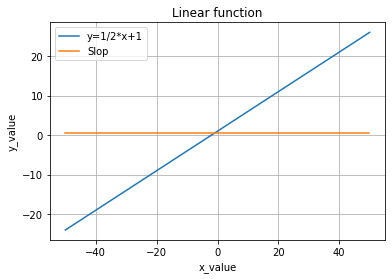

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x, y, label='y=1/2*x+1')
plt.plot(x[:-1], slop, label='Slop')
plt.title('Linear function')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

---
## 【問題5】Pythonの関数化
```Cf.```
+ [numpy.sin — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.sin.html#numpy.sin)
+ [Python 関数に関数を渡す（高階関数） - 鎖プログラム](https://pg-chain.com/python-function-2)


   問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。
   そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^2 , \ (-50<x<50)\\
y = 2x^2 + 2^x , \ (-50<x<50)\\
y = sin(x^{1/2}) , \ (0<x<50)
$$


   また、問題4と同様にグラフを描いてください。
   ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [164]:
def func1(x_min, x_max, width):
    x = np.arange(x_min, x_max+width, width)
    y = x**2
    return x, y
# x, y = func1(x_min, x_max, width)
# print('#x{0}:{1} \n #y{2}:{3}'.format(x.shape, x, y.shape, y))

def func２(x_min, x_max, width):
    x = np.arange(x_min, x_max+width, width)
    y = 2*(x**2) + 2**x 
    return x, y

def func3(x_min, x_max, width):
    x = np.arange(x_min, x_max+width, width)
    y = np.sin(x**1/2)
    return x, y


#勾配関数(高階関数)
def get_grad(func):
    ndarray = np.vstack((x, y)).T
    diff = ndarray[1:] - ndarray[:-1]
    gradient = diff[:, 1]/diff[:, 0]    
    return ndarray, gradient
# ndarray, gradient = get_grad(func1(x_min, x_max, width))
# print('#ndarray{0}:{1} \n #gradient{2}:{3}'.format(
#                                             ndarray.shape, ndarray, 
#                                             gradient.shape, gradient))

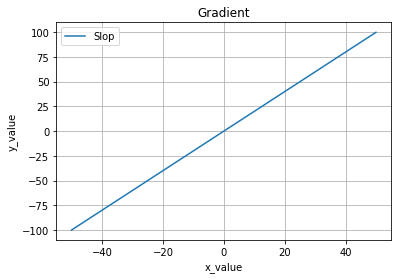

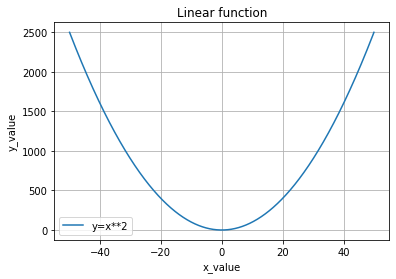

In [165]:
# y＝x**2の描画
x_min = -50
x_max = 50
width = 0.1

ndarray, gradient = get_grad(func1(x_min, x_max, width)) #高階関数: 関数A（関数B） 

plt.plot(ndarray[:-1,0], gradient, label='Slop')
plt.title('Gradient')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

x, y = func1(x_min, x_max, width)

plt.plot(x, y, label='y=x**2')
plt.title('Linear function')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

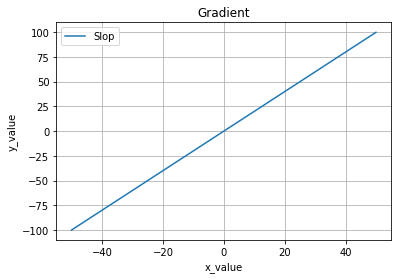

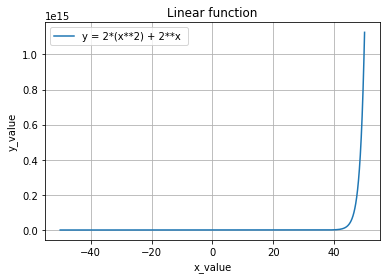

In [166]:
# y = 2*(x**2) + 2**xの描画
x_min = -50
x_max = 50
width = 0.1

ndarray, gradient = get_grad(func2(x_min, x_max, width)) #高階関数: 関数A（関数B） 

plt.plot(ndarray[:-1,0], gradient, label='Slop')
plt.title('Gradient')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

x, y = func2(x_min, x_max, width)

plt.plot(x, y, label='y = 2*(x**2) + 2**x ')
plt.title('Linear function')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

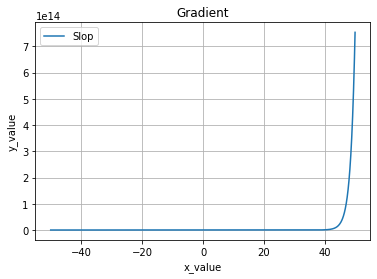

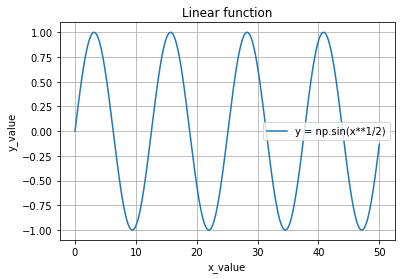

In [167]:
# y = np.sin(x**1/2)の描画
x_min = 0
x_max = 50
width = 0.1

ndarray, gradient = get_grad(func3(x_min, x_max, width)) #高階関数: 関数A（関数B） 

plt.plot(ndarray[:-1,0], gradient, label='Slop')
plt.title('Gradient')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

x, y = func3(x_min, x_max, width)

plt.plot(x, y, label='y = np.sin(x**1/2)')
plt.title('Linear function')
plt.xlabel('x_value')
plt.ylabel('y_value')
plt.legend()
plt.grid(True)
plt.show()

---
以下、失敗コード

```python
# 問題１〜３のまとめ
x_min = -50
x_max = 50
width = 0.1

y = 0.5*x + 1
# y = 2*(x**2) + 2**x 
# y = np.sin(x**1/2)

def get_grad(y, x_min, x_max, width)
    x = np.arange(x_min, x_max+width, width)
    ndarray = np.vstack((x, y)).T
    diff = ndarray[1:, ] - ndarray[:-1, ]
    gradient = diff[:, 1]/diff[:, 0]
    return x, gradient

x, grad = get_gradient(y, x_min, x_max, width)

plt.plot(x, y, label='y=1/2*x+1')
plt.plot(x[:-1], grad, label='Slop')
plt.show()
```

いい感じに関数化したが。。。
求めたいyの位置が関数より前の為反応しない。

---
## 【問題6】最小値を求める

    問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。
    今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。
    minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。
    また、最小のyをとる前後の勾配を表示してください。

```Cf.```
+ [numpy.ndarray.min — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html)
+ [numpy.ndarray.argmin — NumPy v1.16 Manual](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argmin.html)

In [184]:
# y = x**2 
_, y = func1(x_min, x_max, width)
print('「y = x**2」の 最小値:{0} インデックス:{1}'.format(np.min(y), np.argmin(y)))
print('-'*50)

# y = 2(x**2)+2**x 
_, y = func2(x_min, x_max, width)
print('「y = 2(x**2)+2**x」の 最小値:{0} インデックス:{1}'.format(np.min(y), np.argmin(y)))
print('-'*50)

# y = sin(x**1/2) 
_, y = func3(x_min, x_max, width)
print('「y = sin(x**1/2)」の 最小値:{0} インデックス:{1}'.format(np.min(y), np.argmin(y)))

「y = x**2」の 最小値:0.0 インデックス:0
--------------------------------------------------
「y = 2(x**2)+2**x」の 最小値:1.0 インデックス:0
--------------------------------------------------
「y = sin(x**1/2)」の 最小値:-0.9999902065507035 インデックス:220
